In [1]:
import numpy as np
import cv2
from pylab import imread
from skimage.color import rgb2gray
from matplotlib import pyplot as plt 
from scipy.linalg import svd

c:\Users\PC\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# đọc ảnh
image=imread('One_Pillar_Pagoda_Hanoi.jpg')

In [3]:
# Chuyển về ảnh xám
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [4]:
# biến hình ảnh thành dạng mảng
A = np.array(image_gray)
A


array([[ 54,  12,  67, ..., 209,  79,  10],
       [ 36,  57,  65, ..., 207,  57,  20],
       [ 43,  96,  59, ..., 127,  17,  28],
       ...,
       [207, 207, 208, ..., 118, 122, 125],
       [199, 192, 191, ..., 126, 112, 124],
       [184, 167, 151, ..., 100, 110, 128]], dtype=uint8)

In [12]:
def truncated_svd(A, k):
    # SVD của ma trận A
    U, S_diag, V = svd(A)
    # truncated SVD
    U_k = U[:, :k]
    Sigma_k = np.diag(S_diag[:k])
    V_k = V[:k, :]
    # Số thông tin được giữ lại
    A_F = np.sum(S_diag**2)
    A_All = np.sum((A - U_k @ Sigma_k @ V_k)**2)
    percent = (1 - (A_All / A_F)) * 100

    return U_k, Sigma_k, V_k, percent

U_k_1, Sigma_k_1, V_k_1, percent_1 = truncated_svd(A, 50)  
U_k_2, Sigma_k_2, V_k_2, percent_2 = truncated_svd(A, 150)  
U_k_3, Sigma_k_3, V_k_3, percent_3 = truncated_svd(A, 255)  


print("% lượng thông tin được giữ lại khi k=50: ",percent_1)
print("% lượng thông tin được giữ lại khi k=150: ",percent_2)
print("% lượng thông tin được giữ lại khi k=255: ",percent_3)

% lượng thông tin được giữ lại khi k=50:  93.92822943627834
% lượng thông tin được giữ lại khi k=150:  98.64154811948538
% lượng thông tin được giữ lại khi k=255:  99.82389614451677


In [6]:
# Tạo lại ma trận A từ 3 ma trận của truncated_svd
A1 = np.dot(U_k_1, np.dot(Sigma_k_1, V_k_1))
A2 = np.dot(U_k_2, np.dot(Sigma_k_2, V_k_2))
A3 = np.dot(U_k_3, np.dot(Sigma_k_3, V_k_3))
print("Ma trận A1:\n",A1)
print("Ma trận A2:\n",A2)
print("Ma trận A3:\n",A3)

Ma trận A1:
 [[ 82.34142   80.56061   90.38737  ... 132.86676   72.37444   44.87847 ]
 [ 44.856743  49.771137  46.837032 ... 163.85982   80.50813   63.25177 ]
 [ 78.9946    60.966755  60.4901   ... 102.24316   35.515366  30.558699]
 ...
 [169.15842  168.55428  170.86624  ... 113.1875   130.00522  143.08815 ]
 [169.05594  163.55792  175.22615  ... 119.91465  128.33409  127.91057 ]
 [158.9321   156.03949  160.54187  ... 138.124    128.96646  121.46477 ]]
Ma trận A2:
 [[ 23.131243  22.008755  66.85628  ... 226.49348   55.315926   6.030674]
 [ 34.7739    67.57973   60.21698  ... 209.39008   64.91721   25.497084]
 [ 64.16624   85.45985   59.383923 ... 116.69817   29.972815  19.196785]
 ...
 [189.18639  205.50214  203.20981  ... 104.86365  132.13162  122.1073  ]
 [178.78719  194.7849   197.25208  ... 124.73897  117.22408  124.56601 ]
 [172.58176  150.98778  162.8387   ... 112.447014 118.79539  125.52768 ]]
Ma trận A3:
 [[ 53.104996   16.554312   63.31711   ... 207.72015    84.06251
   -1.827

Text(0.5, 1.0, 'Ảnh với k=50')

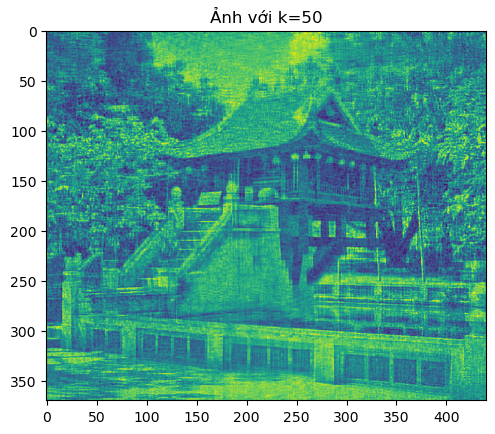

In [14]:
image_svd_1 = plt.imshow(A1)
plt.title("Ảnh với k=50")

Text(0.5, 1.0, 'Ảnh với k=150')

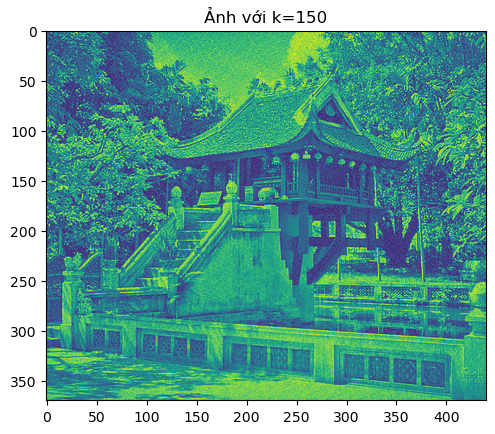

In [15]:
image_svd_2 = plt.imshow(A2)
plt.title("Ảnh với k=150")


Text(0.5, 1.0, 'Ảnh với k=255')

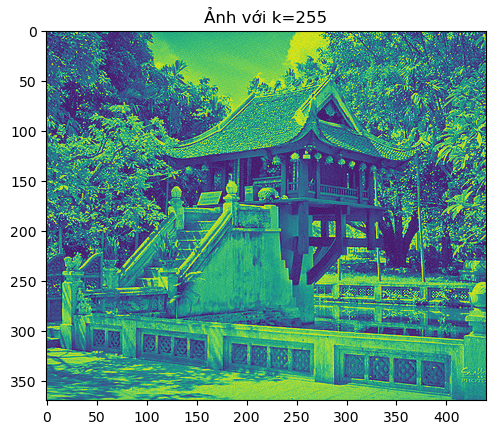

In [16]:
image_svd_3 = plt.imshow(A3)
plt.title("Ảnh với k=255")

Text(0.5, 1.0, 'Ảnh gốc')

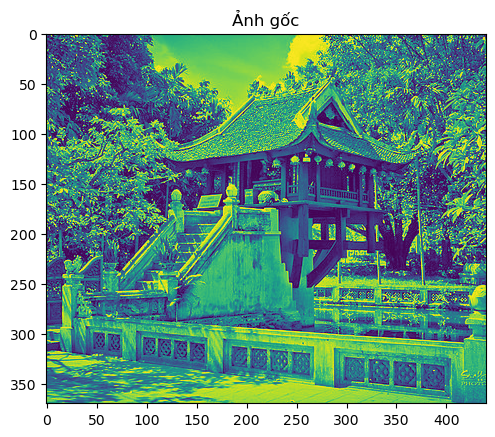

In [13]:
image_gray = plt.imshow(A)
plt.title("Ảnh gốc")